In [1]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [13]:
# Read the csv file using read_csv
# method of pandas
df = pd.read_csv('RELIANCE.csv')
df


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5070,2020-05-22,RELIANCE,EQ,1441.25,1451.80,1458.00,1426.50,1433.00,1431.55,1442.31,17458503,2.518059e+15,388907.0,4083814.0,0.2339
5071,2020-05-26,RELIANCE,EQ,1431.55,1448.15,1449.70,1416.30,1426.00,1424.05,1428.70,15330793,2.190317e+15,341795.0,7437964.0,0.4852
5072,2020-05-27,RELIANCE,EQ,1424.05,1431.00,1454.00,1412.00,1449.85,1445.55,1430.20,16460764,2.354223e+15,348477.0,6524302.0,0.3964
5073,2020-05-28,RELIANCE,EQ,1445.55,1455.00,1479.75,1449.00,1471.05,1472.25,1467.50,18519252,2.717698e+15,405603.0,8377100.0,0.4523


In [14]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()


,Open-Close,High-Low
0,-14.20,14.20
1,-13.45,20.55
2,-25.85,31.25
3,-5.35,11.70
4,-19.55,24.90


In [15]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y


array([1, 1, 1, ..., 1, 0, 0])

In [16]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]


In [17]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)


In [18]:
df['Predicted_Signal'] = cls.predict(X)


In [19]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()


In [22]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)


In [23]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover,Trades,Deliverable Volume,%Deliverble,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,...,1.111319e+14,NaN,NaN,NaN,-14.20,14.20,1,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,...,2.500222e+14,NaN,NaN,NaN,-13.45,20.55,1,0.080056,0.080056,0.080056
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,...,7.373697e+14,NaN,NaN,NaN,-25.85,31.25,1,0.039176,0.039176,0.119232
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,...,4.633254e+14,NaN,NaN,NaN,-5.35,11.70,1,0.041947,0.041947,0.161179
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,...,6.138388e+14,NaN,NaN,NaN,-19.55,24.90,1,0.068626,0.068626,0.229804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5070,2020-05-22,RELIANCE,EQ,1441.25,1451.80,1458.00,1426.50,1433.00,1431.55,1442.31,...,2.518059e+15,388907.0,4083814.0,0.2339,20.25,31.50,1,-0.006730,-0.006730,3.375374
5071,2020-05-26,RELIANCE,EQ,1431.55,1448.15,1449.70,1416.30,1426.00,1424.05,1428.70,...,2.190317e+15,341795.0,7437964.0,0.4852,24.10,33.40,1,-0.005239,-0.005239,3.370135
5072,2020-05-27,RELIANCE,EQ,1424.05,1431.00,1454.00,1412.00,1449.85,1445.55,1430.20,...,2.354223e+15,348477.0,6524302.0,0.3964,-14.55,42.00,1,0.015098,0.015098,3.385233
5073,2020-05-28,RELIANCE,EQ,1445.55,1455.00,1479.75,1449.00,1471.05,1472.25,1467.50,...,2.717698e+15,405603.0,8377100.0,0.4523,-17.25,30.75,1,0.018470,0.018470,3.403704


In [24]:
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,...,NaN,NaN,NaN,-14.20,14.20,1,NaN,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,...,NaN,NaN,NaN,-13.45,20.55,1,0.080056,0.080056,0.080056,0.080056
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,...,NaN,NaN,NaN,-25.85,31.25,1,0.039176,0.039176,0.119232,0.119232
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,...,NaN,NaN,NaN,-5.35,11.70,1,0.041947,0.041947,0.161179,0.161179
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,...,NaN,NaN,NaN,-19.55,24.90,1,0.068626,0.068626,0.229804,0.229804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5070,2020-05-22,RELIANCE,EQ,1441.25,1451.80,1458.00,1426.50,1433.00,1431.55,1442.31,...,388907.0,4083814.0,0.2339,20.25,31.50,1,-0.006730,-0.006730,3.375374,4.574602
5071,2020-05-26,RELIANCE,EQ,1431.55,1448.15,1449.70,1416.30,1426.00,1424.05,1428.70,...,341795.0,7437964.0,0.4852,24.10,33.40,1,-0.005239,-0.005239,3.370135,4.569363
5072,2020-05-27,RELIANCE,EQ,1424.05,1431.00,1454.00,1412.00,1449.85,1445.55,1430.20,...,348477.0,6524302.0,0.3964,-14.55,42.00,1,0.015098,0.015098,3.385233,4.584461
5073,2020-05-28,RELIANCE,EQ,1445.55,1455.00,1479.75,1449.00,1471.05,1472.25,1467.50,...,405603.0,8377100.0,0.4523,-17.25,30.75,1,0.018470,0.018470,3.403704,4.602932


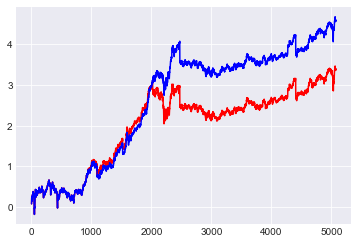

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')
